Establish a relationship between:
1. price and house size
2. price and views - *done*
3. price and condition

Overall Questions:
1. What is the biggest influence on price?
2. Are more expensive houses an easier sell?

Increasing Views:
1. Views vs Price
2. Views vs Grade
3. Views cs condition

House Specs:
1. Size of living space vs Size of lot
2. Floors vs living space
3. House condition vs grade
4. How recently revovated vs views 

In [508]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import random
import sklearn
%matplotlib inline

In [509]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [510]:
def remove_outlier(df_in, col_name):
   q1 = df_in[col_name].quantile(0.25)
   q3 = df_in[col_name].quantile(0.75)
   iqr = q3-q1 #Interquartile range
   fence_low  = q1 - 1.5*iqr
   fence_high = q3 + 1.5*iqr
   df_out = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
   return df_out

In [511]:
price_drop = remove_outlier(df, 'price').index
df.drop(index= price_drop, inplace= True)

sqft_living_drop = remove_outlier(df, 'sqft_living').index
df.drop(index= sqft_living_drop, inplace= True)

sqft_living15_drop = remove_outlier(df, 'sqft_living15').index
df.drop(index= sqft_living15_drop, inplace= True)

sqft_lot_drop = remove_outlier(df, 'sqft_lot').index
df.drop(index= sqft_lot_drop, inplace= True)

sqft_lot15_drop = remove_outlier(df, 'sqft_lot15').index
df.drop(index= sqft_lot15_drop, inplace= True)

In [513]:
df.dropna(subset=['view'], how='all', inplace=True)

In [514]:
df.drop(columns='waterfront', axis=1, inplace= True)

KeyError: "['waterfront'] not found in axis"

In [515]:
df['date'] = pd.to_datetime(df['date'])

In [519]:
data_df = df[(df['grade'] >=8) & (df['condition'] >=4) & (df['bedrooms'] >=2)]

In [520]:
data_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
24,3814700200,2014-11-20,329000.0,3,2.25,2450,6500,2.0,0.0,4,8,2450,0.0,1985,0.0,98030,47.3739,-122.172,2200,6865
27,3303700376,2014-12-01,667000.0,3,1.00,1400,1581,1.5,0.0,5,8,1400,0.0,1909,0.0,98112,47.6221,-122.314,1860,3861
33,7589200193,2014-11-10,535000.0,3,1.00,1090,3000,1.5,0.0,4,8,1090,0.0,1929,0.0,98117,47.6889,-122.375,1570,5080
37,2768000400,2014-12-30,640000.0,4,2.00,2360,6000,2.0,0.0,4,8,2360,0.0,1904,0.0,98107,47.6702,-122.362,1730,4700
47,4178300310,2014-07-16,785000.0,4,2.50,2290,13416,2.0,0.0,4,9,2290,0.0,1981,0.0,98007,47.6194,-122.151,2680,13685
51,7231300125,2015-02-17,345000.0,5,2.50,3150,9134,1.0,0.0,4,8,1640,1510.0,1966,0.0,98056,47.4934,-122.189,1990,9133
58,7922800400,2014-08-27,951000.0,5,3.25,3250,14342,2.0,4.0,4,8,3250,0.0,1968,NaN,98008,47.5880,-122.116,2960,11044
62,5072410070,2014-10-21,505000.0,3,1.75,2519,8690,2.0,0.0,5,8,2519,0.0,1973,0.0,98166,47.4428,-122.344,2500,9500
91,5036300431,2015-03-11,1100000.0,5,2.75,3520,6353,2.0,0.0,4,10,3520,0.0,2001,0.0,98199,47.6506,-122.391,2520,6250
100,1952200240,2014-06-11,850830.0,3,2.50,2070,13241,1.5,0.0,5,9,1270,800.0,1910,0.0,98102,47.6415,-122.315,2200,4500


In [287]:
# display(df.info())
# df.describe()

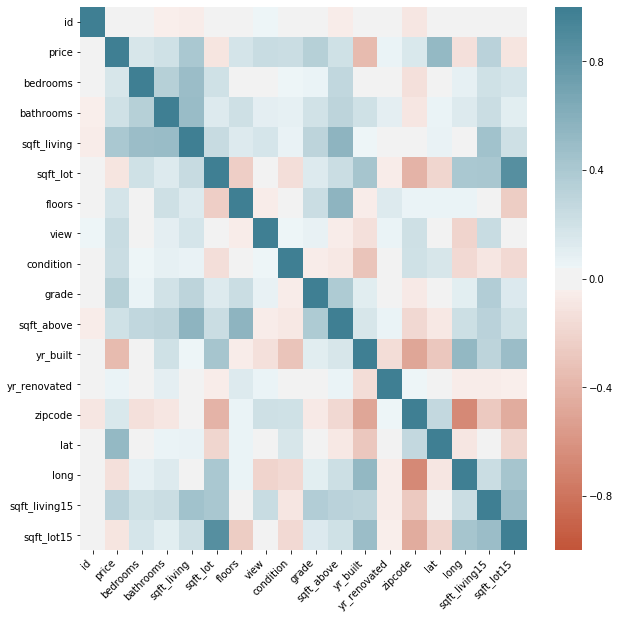

In [521]:
corr = data_df.corr()

plt.figure(figsize = (10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [197]:
#df2 = df[['sqft_lot','sqft_living','sqft_lot15','sqft_living15']]
# df2

In [198]:
# df.isna().any()

In [199]:
# df.isna().sum()

In [200]:
# df.isnull().sum()

In [ ]:
height = df['price']
bars = df['view']
 
plt.bar(bars, height)
 
plt.show()
 

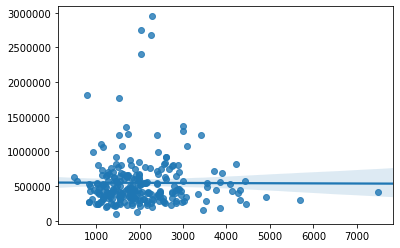

In [216]:
x = random.sample(list(df['sqft_living']), k=250)
y = random.sample(list(df['price']), k=250)

sns.regplot(x, y)
plt.show()


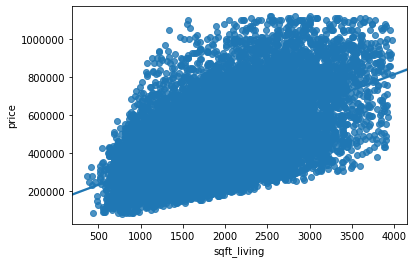

In [370]:
x = df['sqft_living']
y = df['price']

sns.regplot(x, y)
plt.show()

<BarContainer object of 21534 artists>

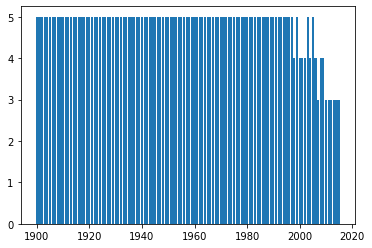

In [289]:
x = df['yr_built']
y = df['condition']
 
plt.bar(x, y) 

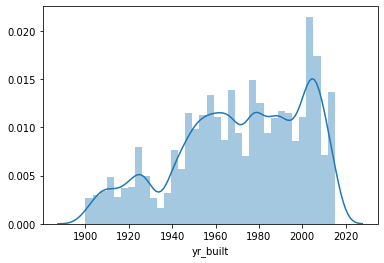

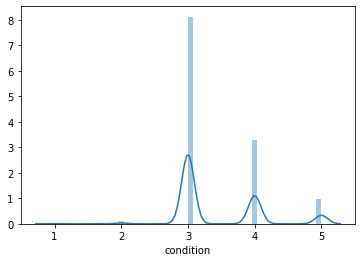

In [257]:
x = df['yr_built']
y = df['condition']
 
sns.distplot(x)
plt.show()

sns.distplot(y)
plt.show()


In [ ]:
x = df['sqft_living']
y = df['sqft_lot']

sns.regplot(x , y)
plt.show()

In [ ]:
import folium

def generateBaseMap(default_location=[47.6062, -122.3321], default_zoom_start=12):
   base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
   return base_map

generateBaseMap()

In [ ]:
sns.distplot( df['sqft_living'], rug = True )
plt.show()

In [ ]:
house_lot_plot = sns.pairplot(df,
                             vars=['sqft_lot','sqft_living','sqft_lot15','sqft_living15', 'yr_built'
                                  ])
plt.show()

In [ ]:
bedrooms_bathrooms_floors_plot = sns.pairplot(df,
                                              vars=['bedrooms','bathrooms', 'floors','price'
                                              ])
plt.show()

In [ ]:
house_lot_plot = sns.pairplot(df,
                 vars=['bedrooms','bathrooms', 'sqft_lot', 'sqft_living'
                      ])
plt.show()

In [ ]:
x = random.sample(list(df['bathrooms']), k=250)
y = random.sample(list(df['price']), k=250)

plt.bar(x, y)
plt.show()

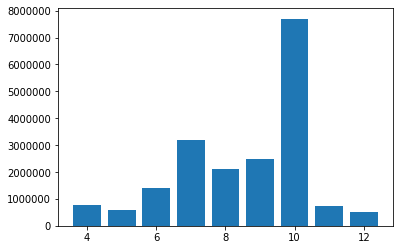

In [28]:
x = random.sample(list(df['grade']), k=1000)
y = random.sample(list(df['price']), k=1000)

plt.bar(x, y)
plt.show()

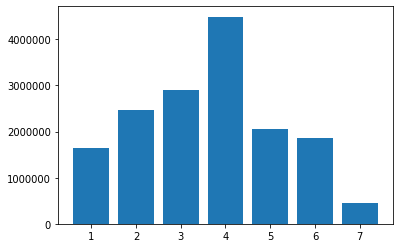

In [24]:
x = random.sample(list(df['bedrooms']), k=1000)
y = random.sample(list(df['price']), k=1000)

plt.bar(x, y)
plt.show()

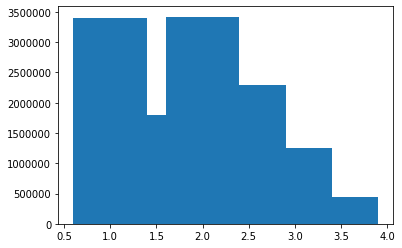

In [25]:
x = random.sample(list(df['floors']), k=1000)
y = random.sample(list(df['price']), k=1000)

plt.bar(x, y)
plt.show()

In [89]:
len(df['zipcode'].unique())

70

In [518]:
# data_df.groupby(['zipcode','grade']).count()
# data_df['zipcode'[data_df['grade']]].count()

TypeError: string indices must be integers

In [561]:
df2 = data_df.groupby('zipcode')['zipcode'].count()
pd.DataFrame(df2)
df2.sort_values(ascending=False, inplace=True)
df2
# df2.index()
# # df2.index.sum()

zipcode
98006    152
98052     91
98040     72
98023     70
98008     58
98199     56
98033     55
98058     54
98117     49
98005     48
98115     45
98103     39
98116     39
98177     38
98122     36
98029     35
98042     34
98007     34
98144     33
98112     32
98056     31
98133     27
98004     27
98003     24
98059     23
98166     22
98105     22
98027     21
98119     21
98198     21
        ... 
98155     18
98136     18
98028     18
98032     18
98125     17
98126     15
98102     14
98109     14
98092     13
98031     13
98030     12
98022     12
98011     12
98055     10
98072      9
98107      9
98038      7
98108      7
98178      7
98075      6
98002      6
98001      3
98039      2
98045      2
98106      2
98188      2
98010      1
98024      1
98168      1
98070      1
Name: zipcode, Length: 64, dtype: int64

In [539]:
data_df.groupby(['zipcode','grade'])

In [232]:
x = df['sqft_living']
y = df['price']
X = sm.add_constant(x)
print(X.shape, x.shape, y.shape)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

(21534, 2) (21534,) (21534,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:30:24   Log-Likelihood:            -2.9912e+05
No. Observations:               21534   AIC:                         5.982e+05
Df Residuals:                   21532   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.215e+04   4404.521     -9.570      0.000   -5.08e+04   -3.35e+04
sqft_living   279.9321      1.938    144.473      0.000     276.134     283.730
==============================================================================
Omnibus:                    14582.265   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516142.289
Skew:                           2.781   Prob(JB):                         0.00
Kurtosis:                      26.331   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [472]:
x = df['sqft_living']
y = df['bathrooms']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

#FIGURE OUT HOW TO PLOT!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bathrooms   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.617e+04
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:06:21   Log-Likelihood:                -12257.
No. Observations:               17288   AIC:                         2.452e+04
Df Residuals:                   17286   BIC:                         2.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6782      0.011     61.277      0.000       0.657       0.700
sqft_living     0.0007   5.59e-06    127.164      0.000       0.001       0.001
==============================================================================
Omnibus:                      561.448   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.301
Skew:                           0.379   Prob(JB):                    1.56e-154
Kurtosis:                       3.639   Cond. No.                     5.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

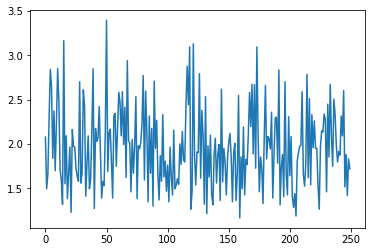

In [506]:
m = 0.0007
b = 0.6782
x_values = random.sample(list(df['sqft_living']), k=250)

regression_line = [(m*x)+b for x in x_values]

plt.plot(regression_line)

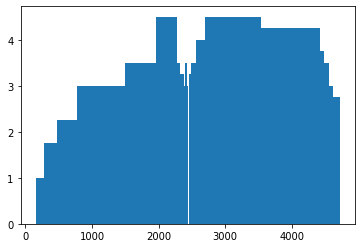

In [468]:
x = data_df['sqft_living']
y = data_df['bathrooms']

plt.bar(x,y)
plt.show()

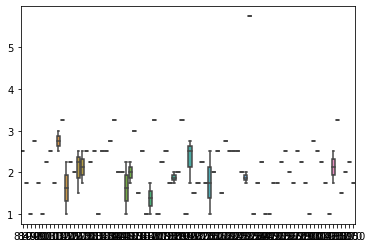

In [440]:
x = random.sample(list(df['sqft_living']), k=100)
y = random.sample(list(df['bathrooms']), k=100)

ax = sns.boxplot(x, y, data=data_df)

In [442]:
x = df['sqft_living15']
y = df['grade']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.076e+04
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:51:32   Log-Likelihood:                -18994.
No. Observations:               17288   AIC:                         3.799e+04
Df Residuals:                   17286   BIC:                         3.801e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.4343      0.020    272.938      0.000       5.395       5.473
sqft_living15     0.0011   1.05e-05    103.728      0.000       0.001       0.001
==============================================================================
Omnibus:                      597.057   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1428.185
Skew:                           0.179   Prob(JB):                    7.47e-311
Kurtosis:                       4.362   Cond. No.                     6.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [264]:
Y = [1,3,4,5,2,3,4]
X = range(1,8)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

array([2.14285714, 0.25      ])

In [231]:
# jp = sns.pairplot(data=df,
#                  x_vars=['zipcode'],
#                  y_vars=['sqft_living'],
#                  height=4.5,
#                  hue='price',
#                  palette={'red', 'white'},
#                  plot_kws=dict(edgecolor='k', linewidth=0.5))